In [1]:
import pandas as pd
import cv2

In [2]:
import os

def count_images_in_folders(folder_path):
    # Initialize a dictionary to store the count of images in each folder
    image_counts = {}

    # List all subdirectories in the dataset path
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            # Count the number of files (images) in the subdirectory
            image_counts[subdir] = len(os.listdir(subdir_path))
    
    return image_counts

# Define the path to the dataset directory
dataset_path = 'data'

# Get the image counts
image_counts = count_images_in_folders(dataset_path)

# Print the image counts
for folder, count in image_counts.items():
    print(f'Folder: {folder}, Image Count: {count}')


Folder: drive, Image Count: 1224
Folder: legglance-flick, Image Count: 1120
Folder: pullshot, Image Count: 1260
Folder: sweep, Image Count: 1120


In [3]:
path='data'
# list down the folders
folders = os.listdir(path)
print(folders)

['drive', 'legglance-flick', 'pullshot', 'sweep']


In [4]:
# for dealing with images
import cv2
# create lists
images  = []
labels  = []
# for each folder
for folder in folders:
    # list down image names
    names=os.listdir(path+'/'+folder)
    # for each image
    for name in names:
        # read an image
        each_image = path + '/' + folder +  '/' + name
        img=cv2.imread(each_image)
        # append image to list
        images.append(img)
        # append folder name (type of shot) to list
        labels.append(folder)

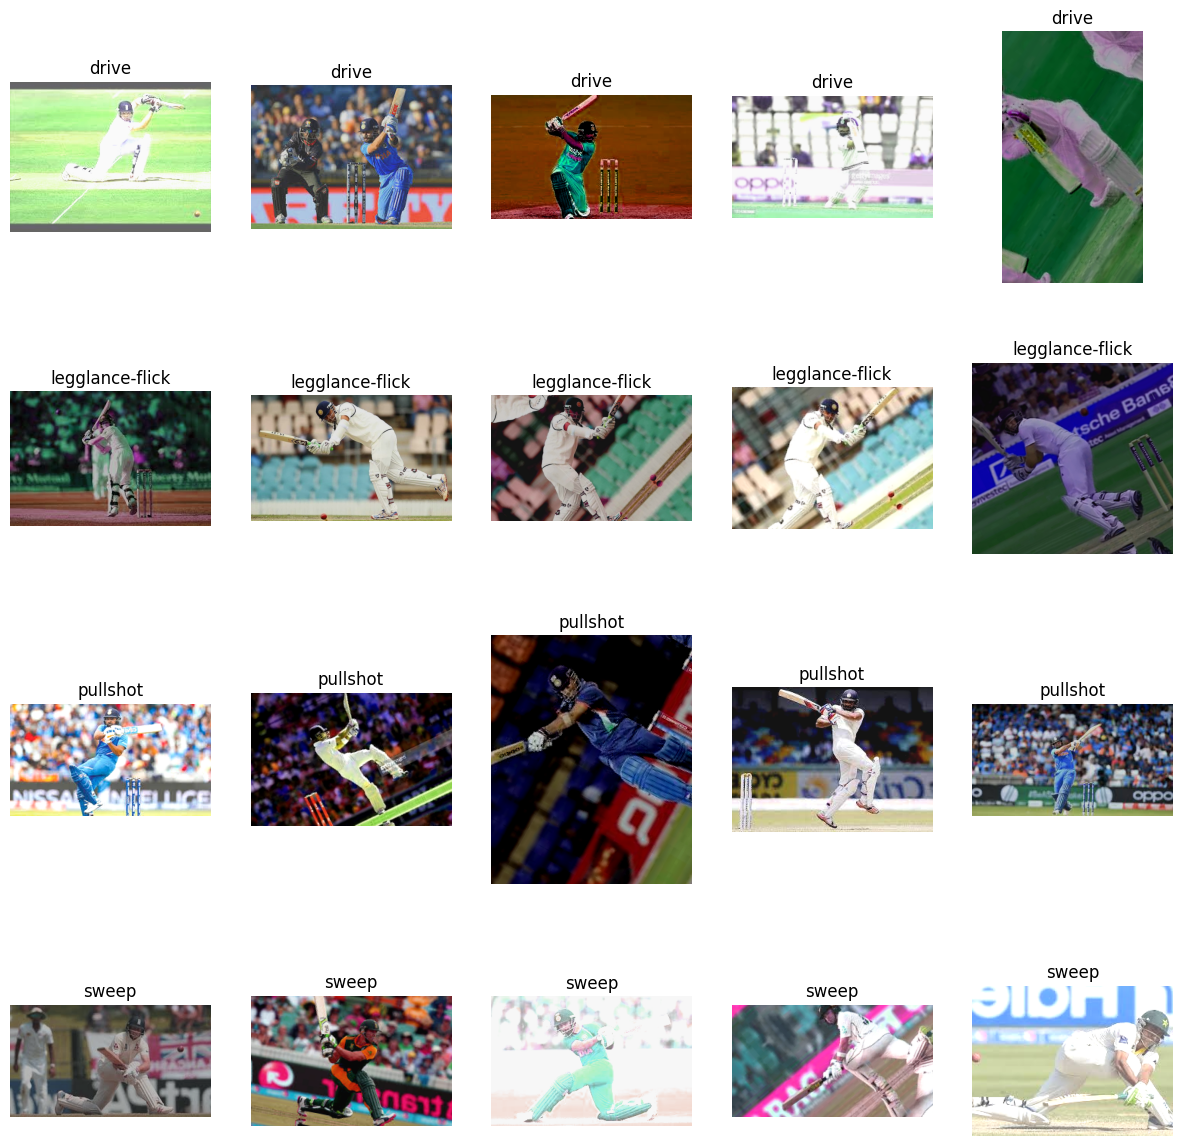

In [5]:
# visualization library
import matplotlib.pyplot as plt
# for randomness
import random
# create subplots with 4 rows and 5 columns
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15,15))
# randomly display 5 images for each shot for each folder
for i in range(len(folders)):
    # read image names
    names=os.listdir(path+'/'+folders[i])
    # randomly select 5 image names
    names= random.sample(names, 5)
    # for each image
    for j in range(len(names)):
      # read an image
      img = cv2.imread(path+ '/' + folders[i]+ '/' +names[j])
      # convert BGR to RGB
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # display image
      ax[i, j].imshow(img)
      # set folder name as title
      ax[i, j].set_title(folders[i])
      # Turn off axis
      ax[i, j].axis('off')

In [6]:
# image augmentation
aug_images=[]
aug_labels=[]
# for each image in training data
for idx in range(len(images)):
  # fetch an image and label
  img  = images[idx]
  label= labels[idx]
  # flip an image
  img_flip = cv2.flip(img, 1)
  # append augmented image to list
  aug_images.append(img_flip)
  # append label to list
  aug_labels.append(label)



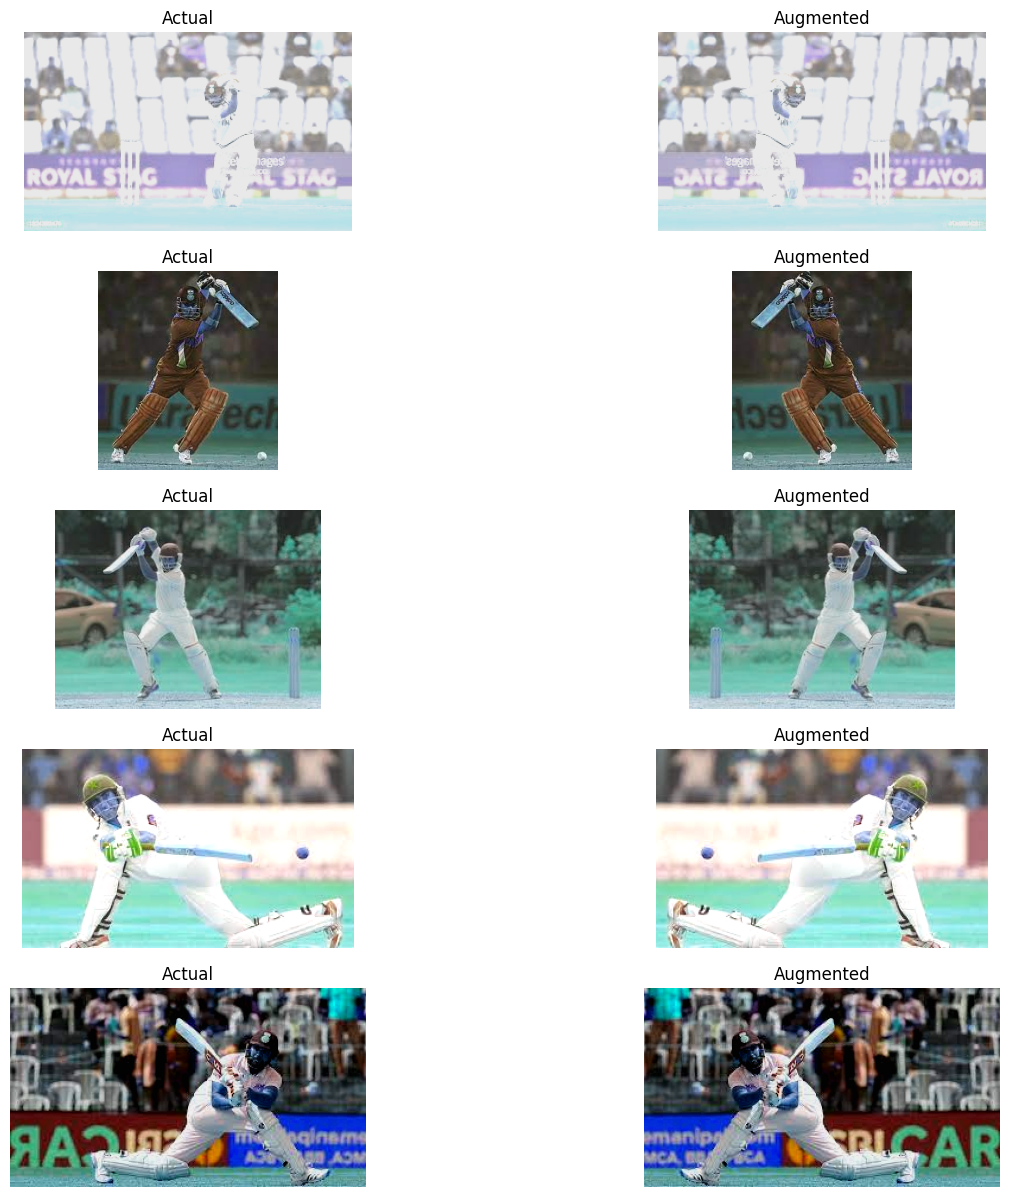

In [7]:
# display actual and augmented image for sample images
# create indices
ind = range(len(aug_images))
# randomly sample indices
ind = random.sample(ind, 5)
# create subplots with 5 rows and 2 columns
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
# for each row
for row in range(5):
  # for each column
  for col in range(2):
    # first column for actual image
    if col==0:
      # display actual image
      ax[row, col].imshow(images[ ind[row] ] )
      # set title
      ax[row, col].set_title('Actual')
      # Turn off axis
      ax[row, col].axis('off')
    # second column for augmented image
    else:
      # display augmented image
      ax[row, col].imshow(aug_images[ ind[row] ] )
      # set title
      ax[row, col].set_title('Augmented')
      # Turn off axis
      ax[row, col].axis('off')